## TWSE_Crawler

### 1. Set destination folder

In [ ]:
from os import mkdir
from os.path import isdir

dst = "data"
if not isdir(dst):
    print("Destination folder: ./{0} not found...creating ./{0}".format(dst))
    mkdir(dst)
else:
    print("Destination folder: ./{}...ready".format(dst))

### 2. Access to TWSE by requests

In [ ]:
import requests
import time
import logging

date = [2019, 3, 6]
date_str = date_str = '{0}{1:02d}{2:02d}'.format(date[0], date[1], date[2])
url = 'http://www.twse.com.tw/exchangeReport/MI_INDEX'

query_params = {
    'date': date_str,
    'response': 'json',
    'type': 'ALL',
    '_': str(round(time.time() * 1000) - 500)
}

try:
    page = requests.get(url, params = query_params)
except:
    logging.error("Cannot open the page on {}.".format(date))

In [ ]:
content = page.json()
print(content)

### 3. Create functions to clean row data and save to files

In [ ]:
import re
import csv

def clean_row(row):
    for index, content in enumerate(row):
        row[index] = re.sub(",", "", content.strip()) # clean commas and spaces
    return row

def record(stock_id, row):
    with open('{}/{}.csv'.format(dst, stock_id), 'a') as f:
        cw = csv.writer(f, lineterminator = '\n')
        cw.writerow(row)

### 4. Save daily trading data (date, share volume, value volume, open, high, low, close, high-low, trades) to file for each stock

In [ ]:
date_str2 = '{0:04d}/{1:02d}/{2:02d}'.format(date[0], date[1], date[2])

for data in content['data5']:    
    sign = '-' if data[9].find('green') > 0 else ''
    row = clean_row([date_str2,        # 日期
                     data[2],          # 成交股數
                     data[4],          # 成交金額
                     data[5],          # 開盤價
                     data[6],          # 最高價
                     data[7],          # 最低價
                     data[8],          # 收盤價
                     sign + data[10],  # 漲跌價差
                     data[3],          # 成交筆數
    ])
    record(data[0].strip(), row)

* You can find the complete program [here](https://www.csie.ntu.edu.tw/~d00922011/python/program/mpl_finance_demo.py).

## Pandas
* Feasible data structures: Series (1D), DataFrame (2D), Panel (3D). We will focus on DataFrame.
* Useful functions of DataFrame: read_csv(), head(), tail(), info(), index, shape, count(), columns, describe(). sort_index(), sort_values(), dropna(), fillna(), pd.concat(), pd.merge()


In [31]:
import pandas as pd

headers = ["Date", "Share Volume", "Value Volume", "Open", "High", "Low", "Close", "High-Low", "Trades"]
df = pd.read_csv("./2330.csv", names = headers)
df.sort_values(by = "Date", inplace = True, ascending = True)
# df["Date"] = pd.to_datetime(df.Date)
df.Date = pd.to_datetime(df.Date)

In [32]:
df.set_index("Date", inplace = True)

In [33]:
df.head(10) # you can try tail(N) for the last N rows

Share Volume  Value Volume   Open   High    Low  Close  High-Low  \
Date                                                                           
2019-01-02      32900482    7276419230  226.5  226.5  219.0  219.5      -6.0   
2019-01-03      34615620    7459051790  214.0  218.0  214.0  215.5      -4.0   
2019-01-04      67043521   13987136785  211.5  211.5  206.5  208.0      -7.5   
2019-01-07      35695176    7591116569  212.0  214.0  211.0  213.0       5.0   
2019-01-08      23794481    5019703557  212.0  212.5  210.0  211.0      -2.0   
2019-01-09      51255446   11006827093  212.0  216.5  211.0  215.5       4.5   
2019-01-10      20832593    4491377349  216.0  216.5  214.5  216.0       0.5   
2019-01-11      28658288    6296719320  219.0  220.5  218.0  220.5       4.5   
2019-01-14      17612296    3844735324  218.5  220.0  217.0  218.5      -2.0   
2019-01-15      42990923    9399209983  216.5  221.0  215.5  221.0       2.5   

            Trades  
Date                
2019-01-02   12329  
2019-01-03   14549  
2019-01-04   28786  
2019-01-07   11224  
2019-01-08    9377  
2019-01-09   14098  
2019-01-10    6018  
2019-01-11   11198  
2019-01-14    6469  
2019-01-15   11609

In [12]:
df.info() # overview

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39 entries, 2019-01-02 to 2019-03-08
Data columns (total 8 columns):
Share Volume    39 non-null int64
Value Volume    39 non-null int64
Open            39 non-null float64
High            39 non-null float64
Low             39 non-null float64
Close           39 non-null float64
High-Low        39 non-null float64
Trades          39 non-null int64
dtypes: float64(5), int64(3)
memory usage: 2.7 KB


In [13]:
df.shape

(39, 8)

In [14]:
df.count()

Share Volume    39
Value Volume    39
Open            39
High            39
Low             39
Close           39
High-Low        39
Trades          39
dtype: int64

In [15]:
df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17',
               '2019-01-18', '2019-01-21', '2019-01-22', '2019-01-23',
               '2019-01-24', '2019-01-25', '2019-01-28', '2019-01-29',
               '2019-01-30', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-18', '2019-02-19',
               '2019-02-20', '2019-02-21', '2019-02-22', '2019-02-25',
               '2019-02-26', '2019-02-27', '2019-03-04', '2019-03-05',
               '2019-03-06', '2019-03-07', '2019-03-08'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [16]:
df.columns

Index(['Share Volume', 'Value Volume', 'Open', 'High', 'Low', 'Close',
       'High-Low', 'Trades'],
      dtype='object')

In [17]:
df.describe()

Share Volume  Value Volume        Open        High         Low  \
count  3.900000e+01  3.900000e+01   39.000000   39.000000   39.000000   
mean   3.262231e+07  7.320821e+09  225.538462  226.782051  223.833333   
std    1.408740e+07  3.088524e+09    8.525800    8.027744    8.355059   
min    1.722619e+07  3.844735e+09  211.500000  211.500000  206.500000   
25%    2.245273e+07  5.138472e+09  218.750000  220.750000  217.750000   
50%    3.003828e+07  6.665379e+09  226.500000  227.000000  225.000000   
75%    3.682153e+07  8.533225e+09  231.750000  233.250000  230.000000   
max    8.136011e+07  1.854617e+10  239.500000  240.000000  237.000000   

            Close   High-Low        Trades  
count   39.000000  39.000000     39.000000  
mean   225.410256   0.115385  10661.538462  
std      8.251692   3.409471   4549.087866  
min    208.000000  -7.500000   5743.000000  
25%    220.000000  -2.000000   7074.500000  
50%    226.000000   0.000000   9931.000000  
75%    231.500000   2.500000  13085.500000  
max    239.500000   7.000000  28786.000000

In [18]:
df["Traded Volume per Trade"] = df["Share Volume"] / df["Trades"]
df["Traded Volume per Trade"] = df["Traded Volume per Trade"].apply(round)
df["Traded Volume per Trade"].head()

Date
2019-01-02    2669
2019-01-03    2379
2019-01-04    2329
2019-01-07    3180
2019-01-08    2538
Name: Traded Volume per Trade, dtype: int64

In [19]:
?df.plot

Text(0,0.5,'Price')

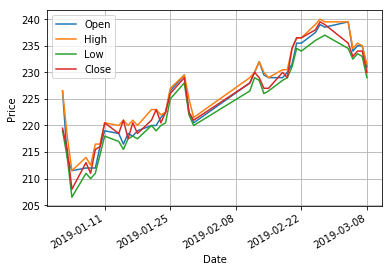

In [34]:
fig =df[["Open", "High", "Low", "Close"]].plot.line(grid = True)
fig.set_ylabel("Price")

In [21]:
closes = df.loc[:, ["Close"]]
closes.head(10)

Close
Date             
2019-01-02  219.5
2019-01-03  215.5
2019-01-04  208.0
2019-01-07  213.0
2019-01-08  211.0
2019-01-09  215.5
2019-01-10  216.0
2019-01-11  220.5
2019-01-14  218.5
2019-01-15  221.0

In [22]:
print(closes.max())
print(closes.min())

Close    239.5
dtype: float64
Close    208.0
dtype: float64


In [23]:
p = closes.values
returns = pd.DataFrame((p[1:] - p[:-1]) / p[:-1] * 100, columns = ["Return Rate"])
print(returns)

    Return Rate
0     -1.822323
1     -3.480278
2      2.403846
3     -0.938967
4      2.132701
5      0.232019
6      2.083333
7     -0.907029
8      1.144165
9     -1.583710
10     1.379310
11    -0.907029
12     1.144165
13     0.904977
14    -1.121076
15     0.907029
16     1.573034
17     1.327434
18    -2.838428
19    -0.674157
20     3.167421
21     0.877193
22    -0.434783
23    -0.873362
24     0.000000
25     1.321586
26    -0.434783
27     2.401747
28     0.852878
29     0.000000
30     0.634249
31     0.630252
32    -0.208768
33    -1.464435
34    -1.061571
35     0.429185
36     0.000000
37    -1.709402


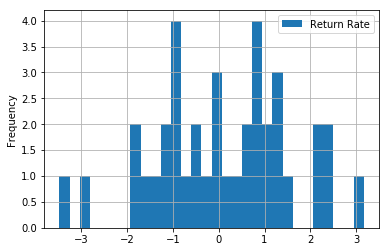

In [24]:
returns.plot.hist(bins = 30, grid = True)

## matplotlib
* Reference: [Matplotlib Tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/) by Nicolas P. Rougier

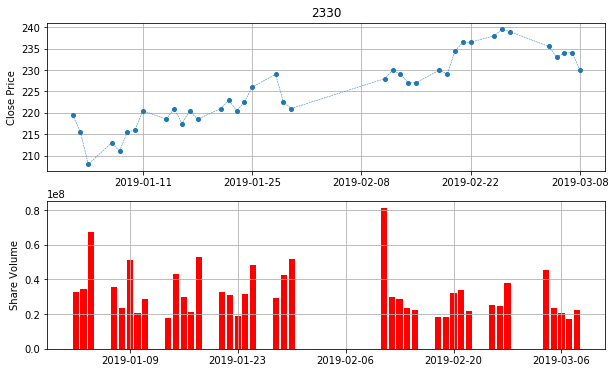

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.subplot(211)
plt.title("2330")
plt.plot(df.index, df["Close"], "o-", linewidth = 0.5, linestyle = "--", markersize = 4)
plt.grid(True)
plt.ylabel("Close Price")

plt.subplot(212)
plt.bar(df.index, df["Share Volume"], color = "r")
plt.grid(True)
plt.ylabel("Share Volume")

plt.show()
plt.savefig("2330.png", dpi = 150)

* See [mpl_finance](https://github.com/matplotlib/mpl_finance) for financial plots.